# Movie Dataset Analysis

The aim of this project is to analyse the movie industry and explore the correlation between movie success and  other movie's features. The dataset used can be found at this link: https://www.kaggle.com/rounakbanik/the-movies-dataset.

## 1. Data pre-processing

The dataset chosen for this project is the file movie_metadata, which contains information about 45 thousands movies. After the preprocessing and polishing of the relevant data, the movies considered for the analysis are 7400 titles. 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px
plt.style.use('ggplot')
from matplotlib.pyplot import figure
%matplotlib inline
matplotlib.rcParams['figure.figsize']=(15,10)
import warnings
warnings.filterwarnings("ignore")

In [2]:
meta=pd.read_csv('movies_metadata.csv', low_memory=False)
meta = meta[['genres','original_title','popularity','production_companies','release_date','revenue','runtime','vote_average', 'vote_count']]
meta.head(n=5)

,genres,original_title,popularity,production_companies,release_date,revenue,runtime,vote_average,vote_count
0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",Toy Story,21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]",1995-10-30,373554033.0,81.0,7.7,5415.0
1,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",Jumanji,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...",1995-12-15,262797249.0,104.0,6.9,2413.0
2,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",Grumpier Old Men,11.7129,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...",1995-12-22,0.0,101.0,6.5,92.0
3,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",Waiting to Exhale,3.859495,[{'name': 'Twentieth Century Fox Film Corporat...,1995-12-22,81452156.0,127.0,6.1,34.0
4,"[{'id': 35, 'name': 'Comedy'}]",Father of the Bride Part II,8.387519,"[{'name': 'Sandollar Productions', 'id': 5842}...",1995-02-10,76578911.0,106.0,5.7,173.0


In [3]:
meta.shape

(45466, 9)

In [4]:
#Dropping misiing values
for col in meta.columns:
    pct_missing = np.mean(meta[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

genres - 0%
original_title - 0%
popularity - 0%
production_companies - 0%
release_date - 0%
revenue - 0%
runtime - 1%
vote_average - 0%
vote_count - 0%


In [5]:
meta = meta[meta.revenue != 0.0]
meta.dropna()

,genres,original_title,popularity,production_companies,release_date,revenue,runtime,vote_average,vote_count
0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",Toy Story,21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]",1995-10-30,373554033.0,81.0,7.7,5415.0
1,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",Jumanji,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...",1995-12-15,262797249.0,104.0,6.9,2413.0
3,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",Waiting to Exhale,3.859495,[{'name': 'Twentieth Century Fox Film Corporat...,1995-12-22,81452156.0,127.0,6.1,34.0
4,"[{'id': 35, 'name': 'Comedy'}]",Father of the Bride Part II,8.387519,"[{'name': 'Sandollar Productions', 'id': 5842}...",1995-02-10,76578911.0,106.0,5.7,173.0
5,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",Heat,17.924927,"[{'name': 'Regency Enterprises', 'id': 508}, {...",1995-12-15,187436818.0,170.0,7.7,1886.0
...,...,...,...,...,...,...,...,...,...
45399,"[{'id': 80, 'name': 'Crime'}, {'id': 35, 'name...",Все и сразу,0.201582,"[{'name': 'Кинокомпания «Lunapark»', 'id': 420...",2014-06-05,3.0,0.0,6.0,4.0
45401,"[{'id': 18, 'name': 'Drama'}, {'id': 36, 'name...",Чудо,0.436028,"[{'name': 'Central Partnership', 'id': 9342}, ...",2009-10-09,50656.0,110.0,6.3,3.0
45409,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",Dikari,0.903061,[],2006-11-23,1328612.0,100.0,5.8,6.0
45412,"[{'id': 10749, 'name': 'Romance'}, {'id': 18, ...",Про любоff,0.121844,"[{'name': 'Profit', 'id': 21163}]",2010-09-30,1268793.0,107.0,4.0,3.0


In [6]:
meta = meta.dropna()
print(meta.isna().sum())

genres                  0
original_title          0
popularity              0
production_companies    0
release_date            0
revenue                 0
runtime                 0
vote_average            0
vote_count              0
dtype: int64


In [7]:
#Fixing columns genres and production companies to show one value
import re
genre = []
for x in meta['genres']:
    try:
        genre.append(re.search('\'name\': \'([A-Za-z\s?]+)\'',x)[1])
    except:
        if x == '[]':
            genre.append('na')
        else:
            print(x)
    
meta['genres'] = genre

In [8]:
prod_comp = []
for x in meta['production_companies']:
    try:
        prod_comp.append(re.search('\'name\': \'(.[^\']*)\'',x)[1])
    except:
        if x == '[]':
            prod_comp.append('na')
        else:
            prod_comp.append('irrelevant')

meta['production_companies'] = prod_comp
meta.head(n=3)

,genres,original_title,popularity,production_companies,release_date,revenue,runtime,vote_average,vote_count
0,Animation,Toy Story,21.946943,Pixar Animation Studios,1995-10-30,373554033.0,81.0,7.7,5415.0
1,Adventure,Jumanji,17.015539,TriStar Pictures,1995-12-15,262797249.0,104.0,6.9,2413.0
3,Comedy,Waiting to Exhale,3.859495,Twentieth Century Fox Film Corporation,1995-12-22,81452156.0,127.0,6.1,34.0


In [9]:
#Adjusting release date
year = []
for x in meta['release_date']:
    year.append(re.search('^[0-9]{4}', x)[0])
                
meta['release_date'] = year
meta.head(n=3)

,genres,original_title,popularity,production_companies,release_date,revenue,runtime,vote_average,vote_count
0,Animation,Toy Story,21.946943,Pixar Animation Studios,1995,373554033.0,81.0,7.7,5415.0
1,Adventure,Jumanji,17.015539,TriStar Pictures,1995,262797249.0,104.0,6.9,2413.0
3,Comedy,Waiting to Exhale,3.859495,Twentieth Century Fox Film Corporation,1995,81452156.0,127.0,6.1,34.0


In [10]:
#Data types
meta.dtypes

genres                   object
original_title           object
popularity               object
production_companies     object
release_date             object
revenue                 float64
runtime                 float64
vote_average            float64
vote_count              float64
dtype: object

In [11]:
meta['popularity'] = meta['popularity'].astype(float)
meta['popularity'] = round(meta['popularity'], 1)

In [12]:
meta['release_date'] = meta['release_date'].astype('int64')

In [13]:
meta['runtime'] = meta['runtime'].astype('int64')
meta['revenue'] = meta['revenue'].astype('int64')
meta['vote_count'] = meta['vote_count'].astype('int64')

In [14]:
meta.dtypes

genres                   object
original_title           object
popularity              float64
production_companies     object
release_date              int64
revenue                   int64
runtime                   int64
vote_average            float64
vote_count                int64
dtype: object

In [15]:
meta.head()

,genres,original_title,popularity,production_companies,release_date,revenue,runtime,vote_average,vote_count
0,Animation,Toy Story,21.9,Pixar Animation Studios,1995,373554033,81,7.7,5415
1,Adventure,Jumanji,17.0,TriStar Pictures,1995,262797249,104,6.9,2413
3,Comedy,Waiting to Exhale,3.9,Twentieth Century Fox Film Corporation,1995,81452156,127,6.1,34
4,Comedy,Father of the Bride Part II,8.4,Sandollar Productions,1995,76578911,106,5.7,173
5,Action,Heat,17.9,Regency Enterprises,1995,187436818,170,7.7,1886


In [16]:
#Number of unique values
dict = {}
for i in list(meta.columns):
    dict[i] = meta[i].value_counts().shape[0]

pd.DataFrame(dict,index=["unique count"]).transpose()

,unique count
genres,21
original_title,7258
popularity,359
production_companies,1995
release_date,100
revenue,6857
runtime,167
vote_average,77
vote_count,1792


## 2. Exploratory Data Analysis

In [17]:
meta.corr()

,popularity,release_date,revenue,runtime,vote_average,vote_count
popularity,1.000000,0.102888,0.457961,0.112773,0.161339,0.497464
release_date,0.102888,1.000000,0.134712,-0.036353,-0.111875,0.161517
revenue,0.457961,0.134712,1.000000,0.202575,0.149218,0.781741
runtime,0.112773,-0.036353,0.202575,1.000000,0.296179,0.212000
vote_average,0.161339,-0.111875,0.149218,0.296179,1.000000,0.270743
vote_count,0.497464,0.161517,0.781741,0.212000,0.270743,1.000000


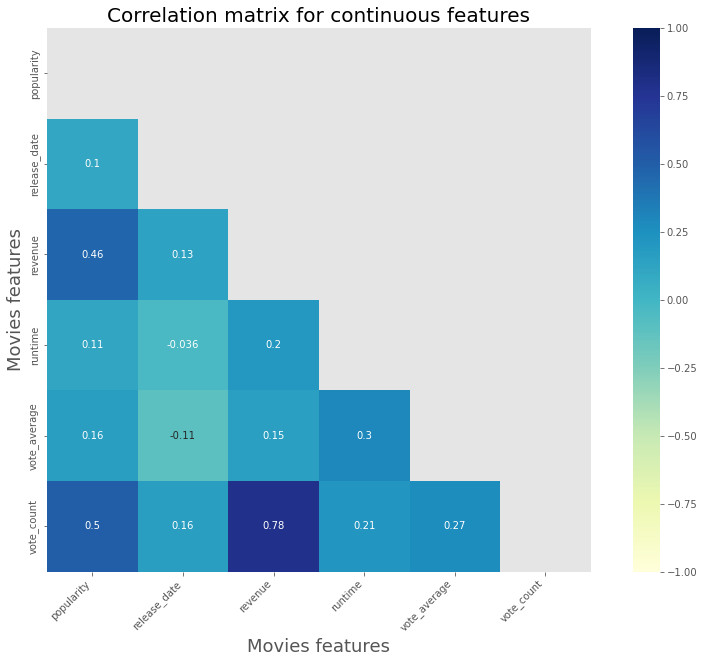

In [18]:
#Correlation matrix for continuous features
matrix=np.triu(meta.corr())
ax = sns.heatmap(meta.corr(), vmin=-1, vmax=1, center=0, cmap= 'YlGnBu', 
                 square=True, annot=True, mask=matrix,
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

plt.title('Correlation matrix for continuous features', fontsize=20)
plt.xlabel('Movies features', fontsize=18)
plt.ylabel('Movies features', fontsize=18)
plt.show()

Positive correlation (0.78) between Revenue and Votes Count

<AxesSubplot:xlabel='revenue', ylabel='vote_count'>

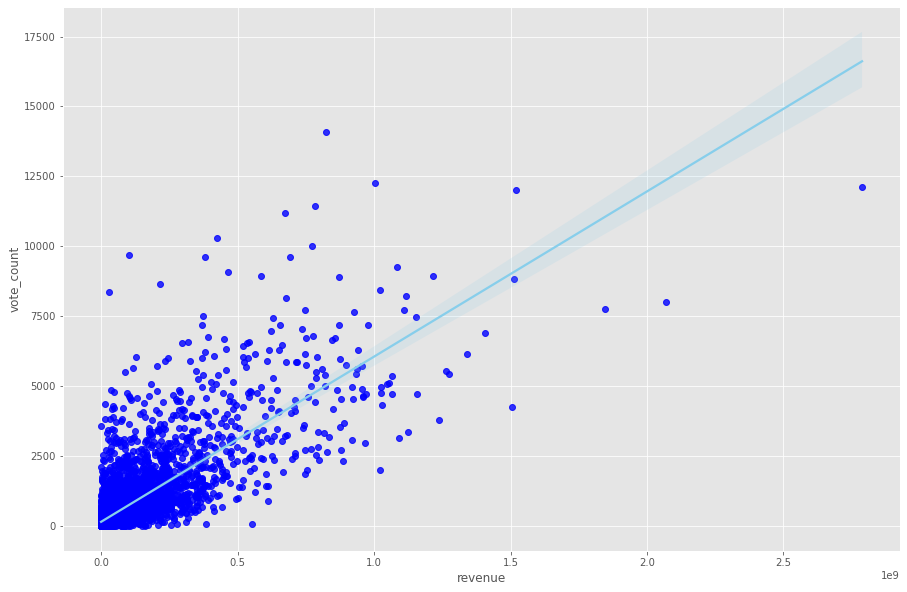

In [19]:
sns.regplot(x='revenue', y='vote_count', data=meta, scatter_kws={'color':'blue'}, line_kws={'color':'skyblue'})

Positive correlation (0.5) between Popularity and Votes Count

<AxesSubplot:xlabel='popularity', ylabel='vote_count'>

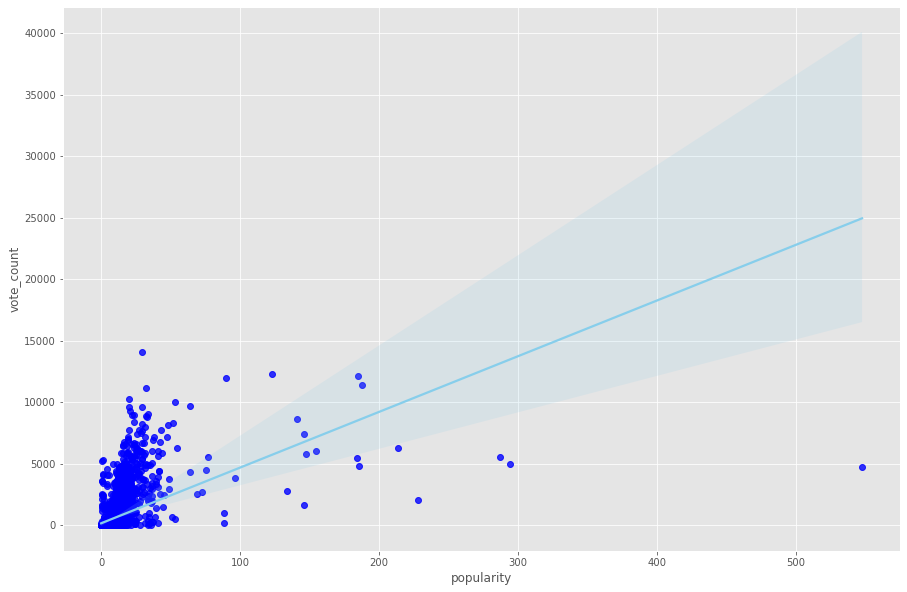

In [20]:
sns.regplot(x='popularity', y='vote_count', data=meta, scatter_kws={'color':'blue'}, line_kws={'color':'skyblue'})

Positive correlation (0.46) between Popularity and Revenue

<AxesSubplot:xlabel='revenue', ylabel='popularity'>

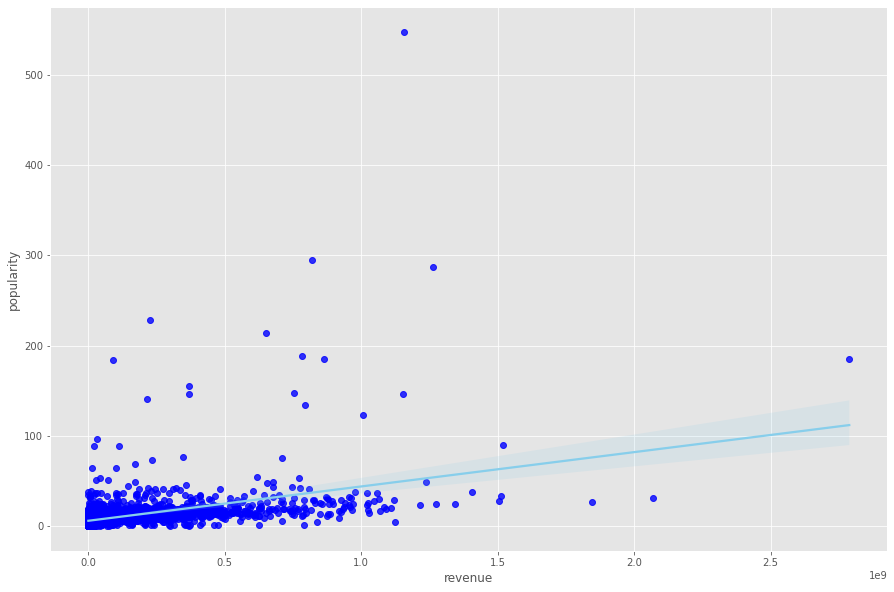

In [21]:
sns.regplot(x='revenue', y='popularity', data=meta, scatter_kws={'color':'blue'}, line_kws={'color':'skyblue'})

Top rated movies:

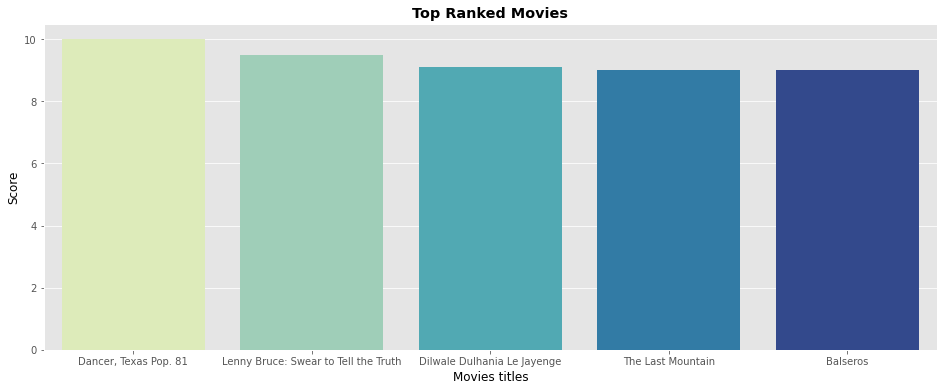

In [22]:
top_rank = meta.sort_values(['vote_average'], ascending = False)

fig,ax1=plt.subplots(figsize=(16,6))
ax1=sns.barplot(x=top_rank['original_title'][:5],y=top_rank['vote_average'][:5], palette = 'YlGnBu')
ax1.set_title('Top Ranked Movies', weight = 'bold')
ax1.set_xlabel('Movies titles', fontsize=12, color='black')
ax1.set_ylabel('Score', fontsize=12, color='black')
plt.show()

Top voted movies:

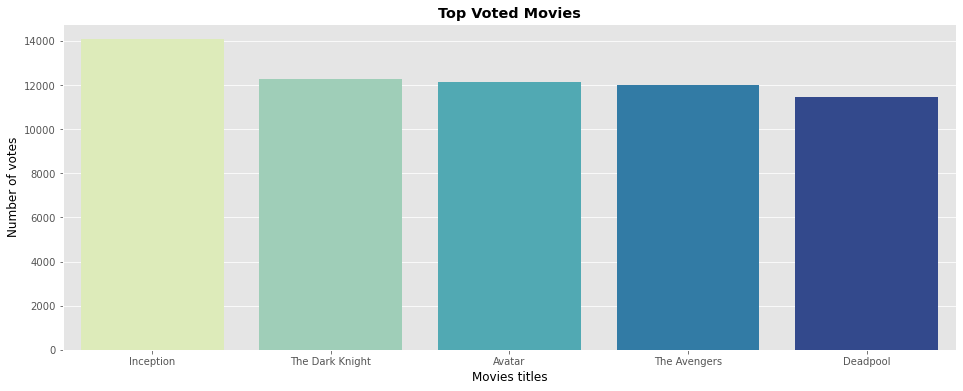

In [23]:
top_voted = meta.sort_values(['vote_count'], ascending = False)

fig,ax2=plt.subplots(figsize=(16,6))
ax2=sns.barplot(x=top_voted['original_title'][:5],y=top_voted['vote_count'][:5], palette = 'YlGnBu')
ax2.set_title('Top Voted Movies', weight = 'bold')
ax2.set_xlabel('Movies titles', fontsize=12, color='black')
ax2.set_ylabel('Number of votes', fontsize=12, color='black')
plt.show()

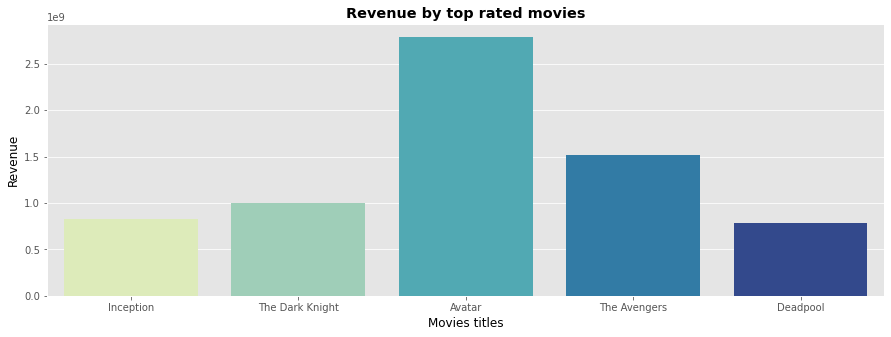

In [24]:
fig,ax3=plt.subplots(figsize=(15,5))
ax3=sns.barplot(x=top_voted['original_title'][:5],y=top_voted['revenue'][:5], palette = 'YlGnBu')
ax3.set_title('Revenue by top rated movies', weight = 'bold')
ax3.set_xlabel('Movies titles', fontsize=12, color='black')
ax3.set_ylabel('Revenue', fontsize=12, color='black')
plt.show()

Movies and Production Companies with highest revenue

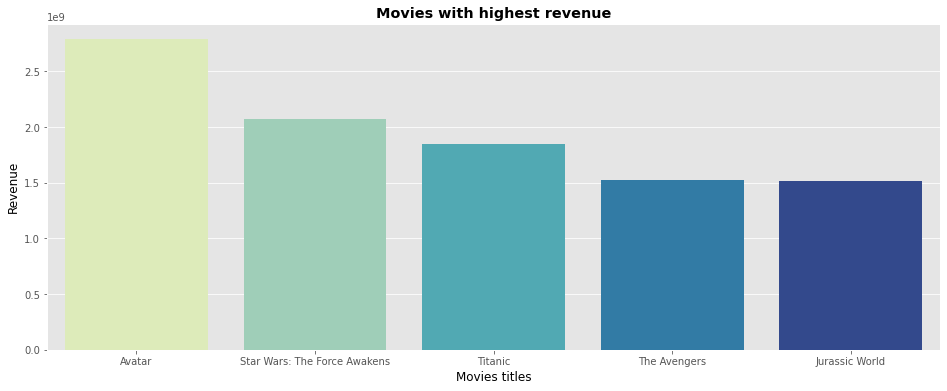

In [25]:
top_rev = meta.sort_values(['revenue'], ascending = False)

fig,ax4=plt.subplots(figsize=(16,6))
ax4=sns.barplot(x=top_rev['original_title'][:5],y=top_rev['revenue'][:5], palette = 'YlGnBu')
ax4.set_title('Movies with highest revenue', weight = 'bold')
ax4.set_xlabel('Movies titles', fontsize=12, color='black')
ax4.set_ylabel('Revenue', fontsize=12, color='black')
plt.show()

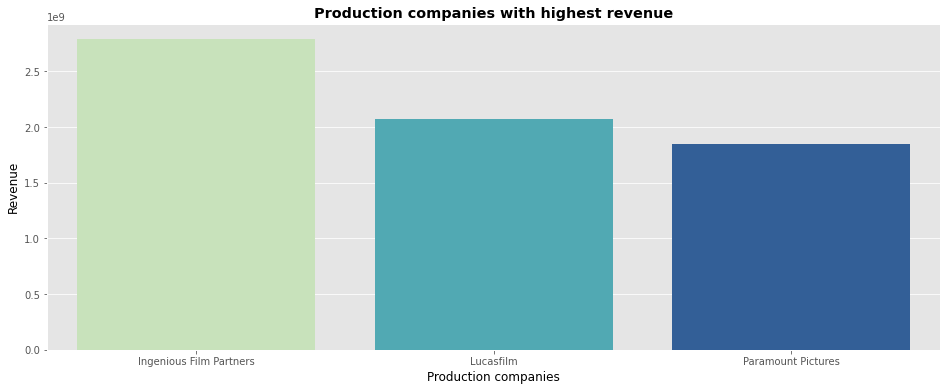

In [26]:
fig,ax5=plt.subplots(figsize=(16,6))
ax5=sns.barplot(x=top_rev['production_companies'][:3],y=top_rev['revenue'][:3], palette = 'YlGnBu')
ax5.set_title('Production companies with highest revenue', weight = 'bold')
ax5.set_xlabel('Production companies', fontsize=12, color='black')
ax5.set_ylabel('Revenue', fontsize=12, color='black')
plt.show()

Target variable (vote_average) to binary variable (1- successful movie, 0- failure)

In [27]:
meta['vote_average'] = np.where(meta['vote_average'] >=6.5, 1, 0)
meta['vote_average'] = meta['vote_average'].astype('object')
meta.head(n=5)

,genres,original_title,popularity,production_companies,release_date,revenue,runtime,vote_average,vote_count
0,Animation,Toy Story,21.9,Pixar Animation Studios,1995,373554033,81,1,5415
1,Adventure,Jumanji,17.0,TriStar Pictures,1995,262797249,104,1,2413
3,Comedy,Waiting to Exhale,3.9,Twentieth Century Fox Film Corporation,1995,81452156,127,0,34
4,Comedy,Father of the Bride Part II,8.4,Sandollar Productions,1995,76578911,106,0,173
5,Action,Heat,17.9,Regency Enterprises,1995,187436818,170,1,1886


0    4198
1    3203
Name: vote_average, dtype: int64

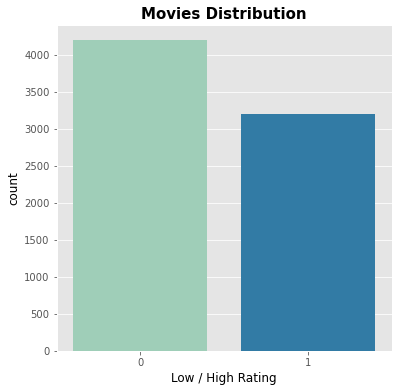

In [28]:
fig, ax6 = plt.subplots(figsize=(6, 6))
ax6 = sns.countplot(x ='vote_average', data = meta, palette='YlGnBu')
ax6.set_title('Movies Distribution', fontsize=15, fontweight='bold', color='black')
ax6.set_xlabel('Low / High Rating', fontsize=12, color='black')
ax6.set_ylabel('count', fontsize=12, color='black')
meta.vote_average.value_counts()

Runtime distribution

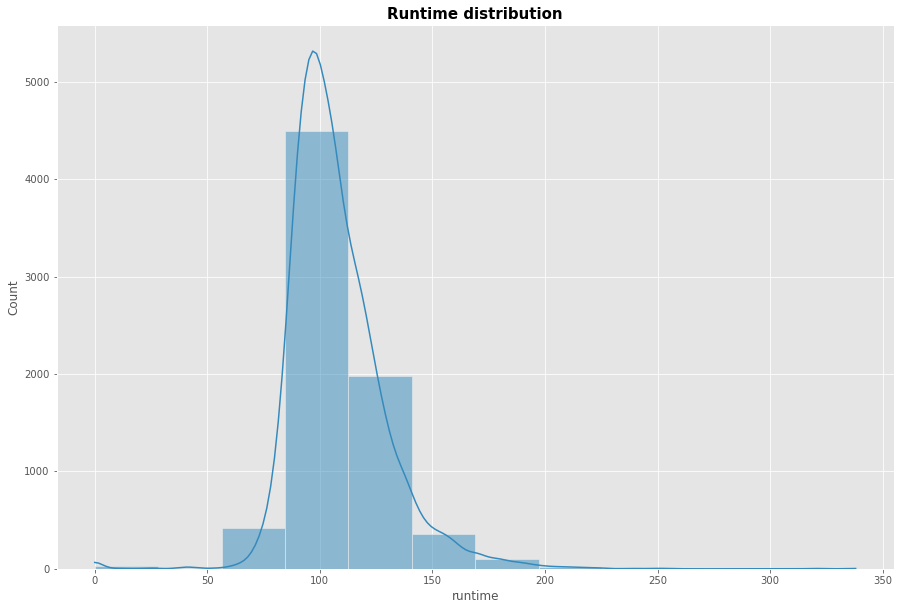

In [29]:
sns.histplot(data=meta, x='runtime', kde=True, palette='YlGnBu', bins=12).set_title('Runtime distribution', fontsize=15, fontweight='bold', color='black')
plt.show()

Movies with longest duration (runtime)

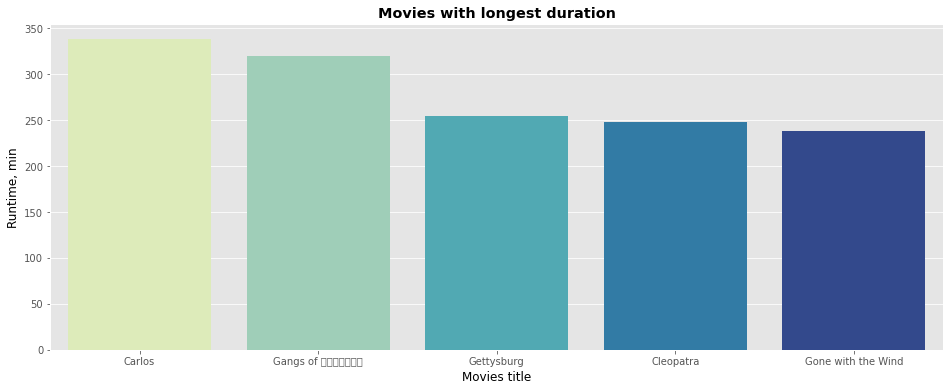

In [30]:
dur_long = meta.sort_values("runtime", ascending = False).reset_index()
fig,ax7=plt.subplots(figsize=(16,6))
ax7=sns.barplot(x=dur_long['original_title'][:5],y=dur_long['runtime'][:5], palette = 'YlGnBu')
ax7.set_title('Movies with longest duration', weight = 'bold')
ax7.set_xlabel('Movies title', fontsize=12, color='black')
ax7.set_ylabel('Runtime, min', fontsize=12, color='black')
plt.show()

Release year distribution

Text(0.5, 1.0, 'Release year distribution')

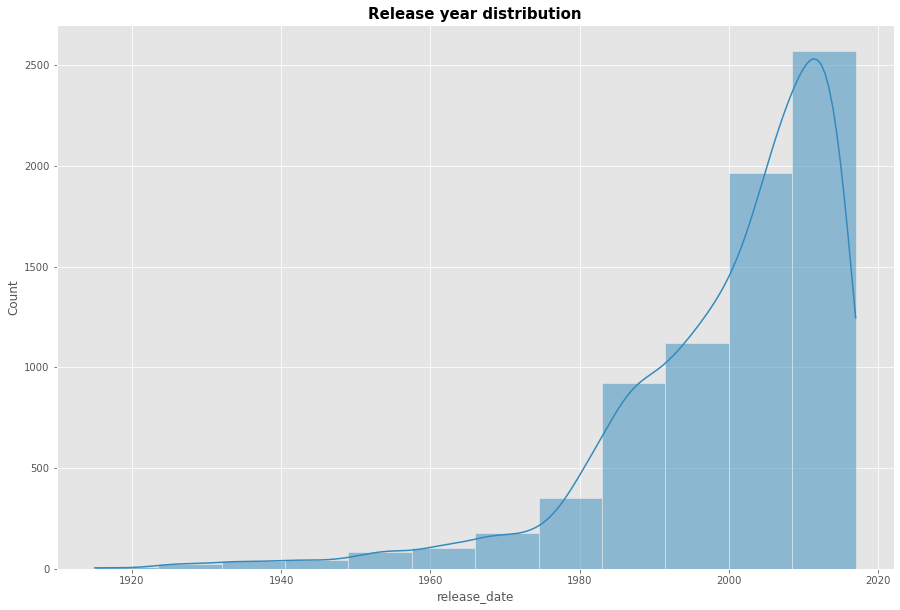

In [31]:
sns.histplot(data=meta, x='release_date', kde=True, palette='YlGnBu', bins=12).set_title('Release year distribution', fontsize=15, fontweight='bold', color='black')

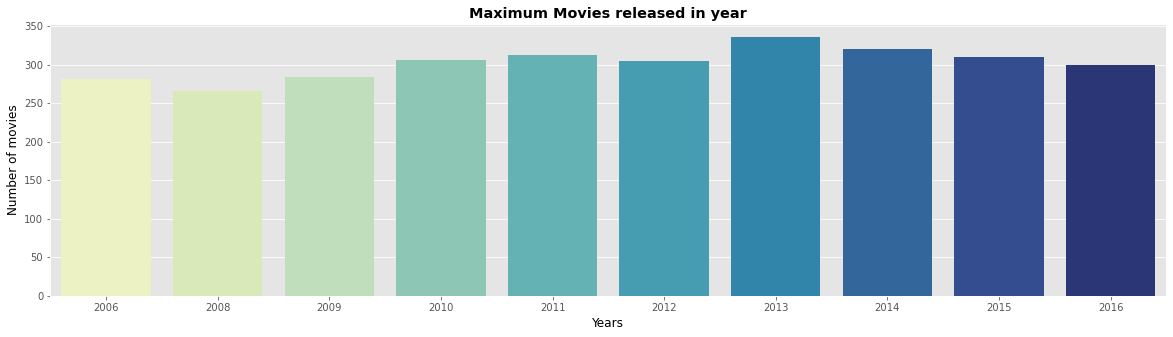

In [32]:
fig,ax8=plt.subplots(figsize=(20,5))
ax8=sns.barplot(x=meta['release_date'].value_counts()[:10].index,y=meta['release_date'].value_counts()[:10], palette='YlGnBu')
ax8.set_title('Maximum Movies released in year', weight = 'bold')
ax8.set_xlabel('Years', fontsize=12, color='black')
ax8.set_ylabel('Number of movies', fontsize=12, color='black')
plt.show()

The oldest movies in the dataset:

In [33]:
old_mov = meta.sort_values("release_date", ascending = True)
old_mov[['original_title', "release_date"]][:8]

,original_title,release_date
8293,The Cheat,1915
6913,The Birth of a Nation,1915
13003,"20,000 Leagues Under the Sea",1916
35914,Mickey,1918
3192,The Kid,1921
7135,Foolish Wives,1922
7667,Safety Last!,1923
7149,The Thief of Bagdad,1924


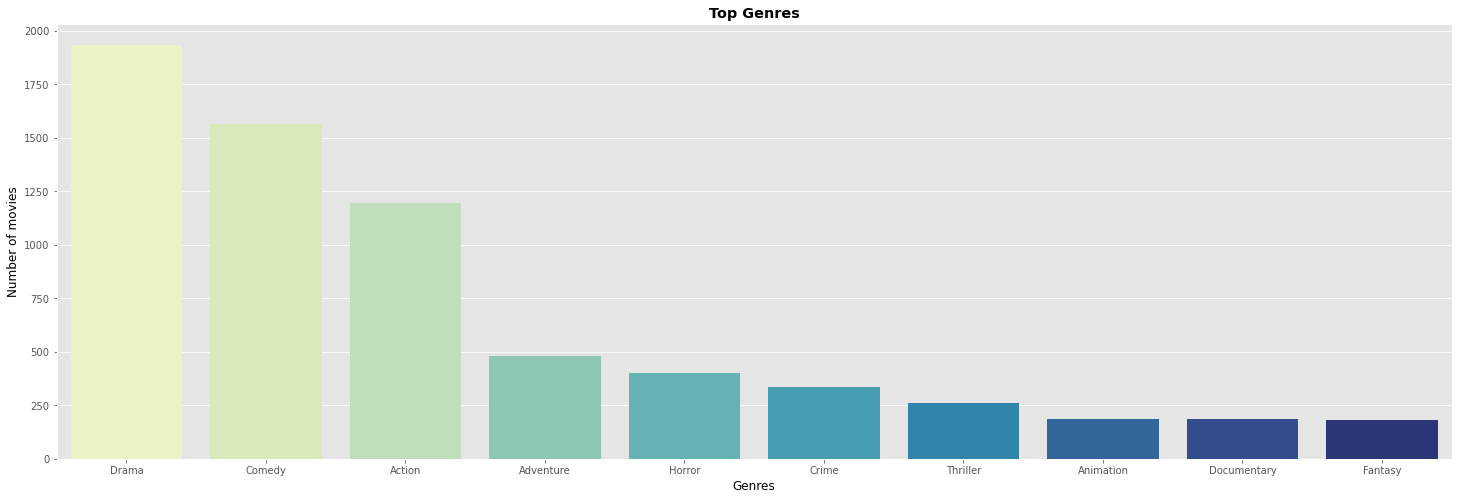

In [34]:
fig,ax9=plt.subplots(figsize=(25,8))
ax9=sns.barplot(x=meta['genres'].value_counts()[:10].index,y=meta['genres'].value_counts()[:10], palette='YlGnBu')
ax9.set_title('Top Genres', weight = 'bold')
ax9.set_xlabel('Genres', fontsize=12, color='black')
ax9.set_ylabel('Number of movies', fontsize=12, color='black')
plt.show()

In [35]:
meta['genres'].value_counts()

Drama              1935
Comedy             1566
Action             1195
Adventure           478
Horror              403
Crime               334
Thriller            259
Animation           188
Documentary         188
Fantasy             182
Romance             176
Science Fiction     116
Mystery              91
Family               79
War                  50
Music                49
Western              44
History              39
na                   22
Foreign               6
TV Movie              1
Name: genres, dtype: int64